# Sophinas Notebook

## Stage 1: Exploratory Data Analysis 

### 1. Data Loading & Initial Inspection

In this section, I load the Scottish Haggis dataset and perform an initial inspection to understand its structure and core properties. This includes checking the number of observations, previewing the first few records, and confirming that the dataset has been loaded correctly before deeper analysis.

The dataset contains several key measurements recorded for each haggis sighting, including:
- species  
- island  
- nose length  
- eye size  
- tail length  
- body mass  
- sex  
- year  

Inspecting the dataset at this early stage helps make sure that:
- columns are present as expected,
- the data has loaded correctly,
- there are no immediate structural issues,
- and the dataset is ready for more detailed exploration.


In [818]:
# Import core libraries for data handling, analysis, and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make the dataframe output easier to read in the notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Use a clean visual style for plots
sns.set(style="whitegrid")

print("Libraries imported successfully.")

# Load the Scottish haggis dataset
df = pd.read_csv("../data/scottish_haggis_2025.csv")

# Print the shape so I can check the expected number of rows and columns
print("Shape (rows, columns):", df.shape)

# Preview the first few rows of the dataset
df.head()

Libraries imported successfully.
Shape (rows, columns): (344, 9)


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


#### Initial Observations
- The dataset has 344 rows and 9 columns.
- The columns appear correctly loaded and the sample rows look consistent.
- No obvious issues like missing headers or broken formatting are visible.


### 2. Exploratory Data Analysis (EDA)
In this section, I look more closely at the structure of the dataset. The aim here is to understand the types of variables I’m working with, check for missing values, and get an overall sense of how the features are distributed. This helps reveal any early issues and also shapes the decisions I make later in the modelling stages.

In [819]:
print("DataFrame Information:")
df.info()

print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

In [820]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [821]:
# Print a summary of the dataset structure (column types, non-null counts, etc.)
print("DataFrame Information:")
df.info()

# Check for missing values in each column
print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

#### Visual Exploratory Data Analysis

Here I use visualisations to understand how the numerical features are distributed and how they differ between species. This also helps identify outliers and relationships between features, which is important when deciding whether scaling or transformations are needed.

#### Histograms


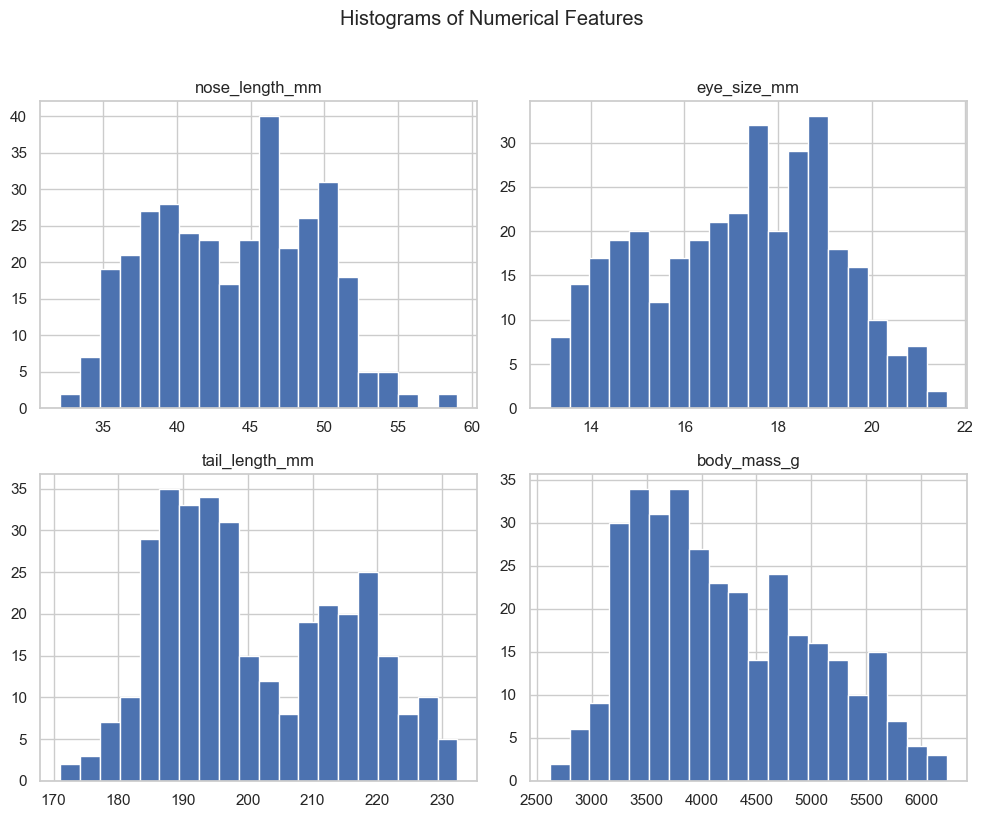

In [822]:
# Select the numerical features to visualise
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Plot histograms to get a sense of how each numerical measurement is distributed
df[numeric_cols].hist(bins=20, figsize=(10, 8))

# Add a main title and tidy up spacing
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

#### Observations

- **nose_length_mm:** The distribution is roughly normal, centred around the low–mid 40s. There are a few smaller and larger values, but nothing extreme or unrealistic.
- **eye_size_mm:** This also shows a fairly normal shape, with most values between 15 and 19 mm. There is some spread toward 20–21 mm, but no major skew.
- **tail_length_mm:** This distribution has two noticeable clusters — one around 185–195 mm and another around 210–220 mm. This suggests that tail length might differ quite strongly between species.
- **body_mass_g:** The body mass distribution is right-skewed. Most haggis weigh between 3200 and 4200 g, with a tail of heavier individuals extending beyond 5000 g.

Overall, the numerical features look biologically reasonable. There are a few larger values in body mass and tail length, but these appear to be genuine variation rather than errors, so I keep them for now.


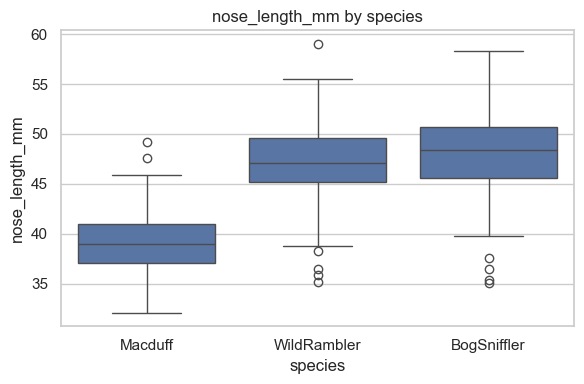

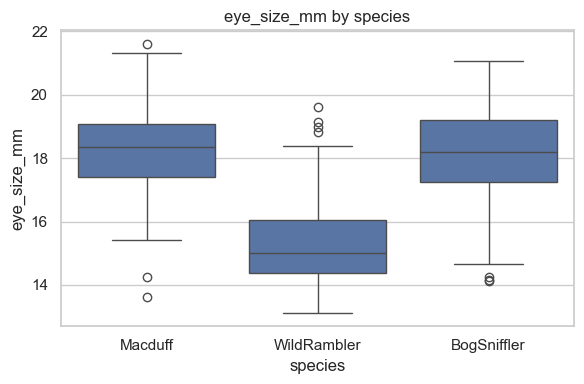

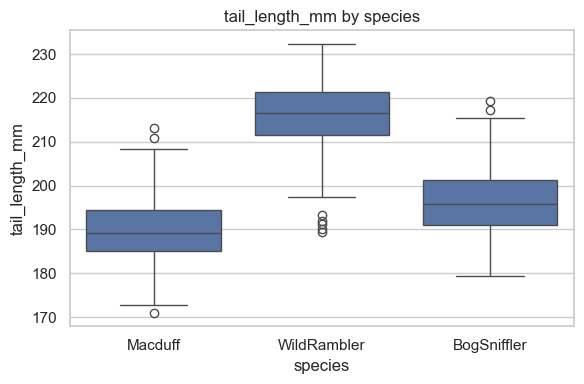

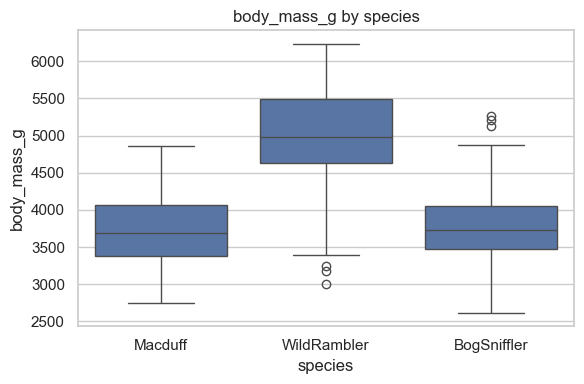

In [823]:
# Create boxplots to compare each numerical feature across species
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    # Boxplot showing how this feature varies between species
    sns.boxplot(data=df, x="species", y=col)
    
    plt.title(f"{col} by species")
    plt.tight_layout()
    plt.show()


#### Observations

- **nose_length_mm:** There are clear differences between species. WildRambler and BogSniffer both have noticeably longer noses than Macduff, with BogSniffer slightly higher on average. This suggests nose length is a strong feature for separating species.

- **eye_size_mm:** Macduff and BogSniffer have similar eye sizes, both generally larger than WildRambler. WildRambler shows the smallest eye sizes overall. This indicates eye size may help distinguish WildRambler from the other two species but is less useful for separating Macduff and BogSniffer.

- **tail_length_mm:** This feature shows very clear separation. WildRambler has the longest tails by a large margin, BogSniffer is in the middle, and Macduff has the shortest tails. This strong ordering makes tail length one of the most discriminative features in the dataset.

- **body_mass_g:** WildRambler is the heaviest species by a wide margin, Macduff is the lightest, and BogSniffer sits between them. This again shows strong species-level differences and supports body mass as an important predictive feature.

Across all features, there are some outliers present, but they appear biologically plausible. Since these differences reflect natural variation rather than errors, I keep them in the dataset. However, models that use distance (like K-Means and KNN) may be sensitive to them, so scaling will be important later.


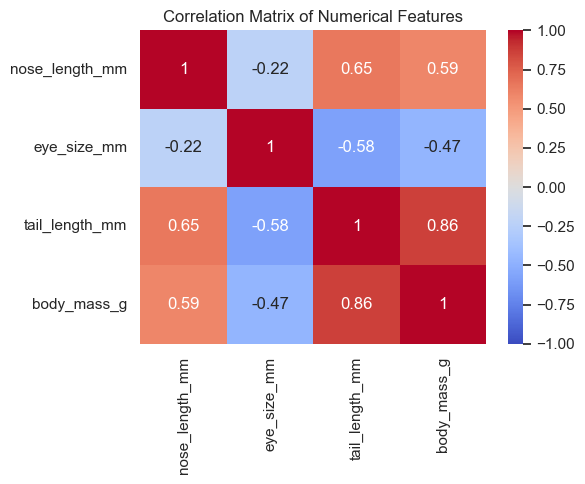

In [824]:
# Plot a correlation heatmap to see how the numerical features relate to each other
plt.figure(figsize=(6, 5))

# Compute the correlation matrix for the selected numerical columns
corr = df[numeric_cols].corr()

# Display the heatmap with correlation values annotated
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


#### Observations 

- The strongest relationship is between **tail_length_mm and body_mass_g** (0.86). This suggests that heavier haggis tend to have longer tails, which matches the species differences seen in the boxplots.
- **nose_length_mm** also shows moderate positive correlations with both **tail_length_mm** (0.65) and **body_mass_g** (0.59). This means these three measurements tend to increase together.
- **eye_size_mm** behaves differently from the other features. It has moderate negative correlations with **tail_length_mm** (–0.58) and **body_mass_g** (–0.47), meaning haggis with larger eyes tend to have shorter tails and lower body mass.
- The weakest relationship is between **eye_size_mm** and **nose_length_mm** (–0.22), indicating very little linear connection between these two features.

Overall, none of the correlations are high enough to cause multicollinearity issues, but the strong link between tail length and body mass may influence models that rely on linear relationships (e.g., regression). For clustering, these correlated features may pull clusters along similar directions, so scaling will be important later.


### 3. Data Cleaning Decisions

Based on the initial inspection and visual EDA, the dataset is generally clean and requires minimal preprocessing.

#### Missing values
The dataset contains **0 missing values** across all columns.  
Therefore, no imputation or row removal is required.

#### Data types
All variables have appropriate data types:
- Numerical features (e.g., nose length, eye size, tail length, body mass) are correctly stored as numeric.
- Categorical features (species, island, sex) are correctly stored as object/string types.

No type conversions are required at this stage.

#### Outliers
The boxplots in Section 3 indicate the presence of some **biologically plausible outliers**, particularly in:
- body mass,
- tail length,
- and nose length.

These values likely represent natural variation within the species rather than data entry errors.  
For this reason, **I will not remove or cap these outliers**. Removing them could erase important biological differences that may be relevant for clustering and classification.

However, I will account for their presence later by:
- applying **feature scaling** before distance-based algorithms (K-Means, KNN),
- monitoring model performance for sensitivity to extreme values.

#### Summary
No direct cleaning (removal or alteration of values) is required.  
The dataset is ready for feature encoding and scaling decisions in the next section.


### 4. Feature Engineering

Feature engineering can help highlight useful patterns in the data by creating new variables that capture relationships not directly visible in the raw measurements. Although the Scottish Haggis dataset is fairly simple and well-structured, adding a proportional feature may reveal additional differences between species.

#### Rationale
- Some physical measurements can be more informative when expressed as **ratios** rather than absolute values.
- Ratios can help certain algorithms (e.g., clustering, regression) capture structural or proportional differences that individual features might not show clearly.

#### Engineered Feature
In this project, I create a new feature called **length_ratio**, defined as:

- `tail_length_mm / nose_length_mm`

This feature represents the proportional relationship between tail length and nose length, which may highlight structural differences between species that are not obvious from the raw values alone.

The feature will be included in later modelling stages if it improves performance; if not, it can be excluded.


In [825]:
# Add a simple engineered feature capturing proportional body structure
# from the raw tail and nose measurements alone.
df["length_ratio"] = df["tail_length_mm"] / df["nose_length_mm"]

# Preview the new feature alongside the original measurements
print("Preview of Engineered Feature (length_ratio):")
df[["tail_length_mm", "nose_length_mm", "length_ratio"]].head()


Preview of Engineered Feature (length_ratio):


,tail_length_mm,nose_length_mm,length_ratio
0,190.23,34.47,5.518712
1,202.80,40.67,4.986477
2,184.34,38.90,4.738817
3,190.97,37.15,5.140511
4,193.00,37.86,5.097728


### 5. Scaling and Encoding Strategy

Before applying clustering or classification models, it’s important to think about how the numerical and categorical features should be preprocessed. Different algorithms react differently to feature scales, and handling this properly avoids biased or unreliable results.

#### Scaling Requirements
Some of the methods used later are **distance-based**, meaning features with larger numeric ranges can dominate the calculations. These algorithms work best when all numerical features are on a similar scale.

Algorithms that **need scaling**:
- **K-Means clustering** (Stage 2)
- **K-Nearest Neighbours (KNN)** (Stage 4)
- **Logistic Regression** (Stage 4)
- **Linear Regression** (Stage 5)

Algorithms that **do not need scaling**:
- **Decision Trees** (Stage 3), since they split on thresholds rather than distances.

**Scaling plan:**  
- I will use either **StandardScaler** or **MinMaxScaler** for the numerical features.
- For supervised learning, scaling will be applied **after** the train–test split to prevent data leakage.
- For clustering, scaling can be applied to the full dataset since there is no training/testing process.

#### Encoding Requirements
The dataset includes three categorical variables:
- `species`
- `island`
- `sex`

Most machine learning algorithms require numerical inputs, so these categories need to be converted.

**Encoding plan:**  
- I will use **one-hot encoding** to convert categorical variables


### Stage 1 Conclusion

Overall, the dataset is in good shape and easy to work with. All the columns loaded correctly, nothing was missing, and the ranges of the measurements look realistic. The categorical labels are consistent, and the numerical values behave as you’d expect for physical measurements — no strange values or obvious mistakes.

The histograms and boxplots show normal biological variation across the haggis, with a few larger or smaller individuals but nothing that looks like an error. These outliers seem genuine, so it's better to keep them. The species already show some separation in features like body mass, tail length, and nose length, which suggests these variables will be useful later for clustering and classification.

The correlation matrix shows some expected relationships (e.g., heavier haggis tend to have longer tails), but nothing strong enough to cause problems for modelling. Each feature still carries its own information. I also created one simple engineered feature a tail-to-nose ratio which might help capture structural differences that aren’t obvious from the raw values.

Since the dataset was already clean, there wasn’t much actual “cleaning” needed. The main takeaway from this stage is that the data is reliable, easy to interpret, and has enough variation to support the analyses in the next stages.


## Stage 2: Unsupervised Learning (Clustering)

In this section, I apply clustering to explore natural groupings in the Scottish Haggis dataset. Since clustering is unsupervised, the aim is to see whether haggis measurements naturally separate into groups and how these relate (if at all) to the species labels.

Clustering performance depends heavily on preprocessing, especially scaling, because K-Means relies on distances between points. For this reason, I scale the numerical features before fitting the model.

### Selecting an Appropriate Value of k

K-Means requires specifying the number of clusters, k. To choose a suitable value, I use:

- the **Elbow Method**, which looks for the point where inertia stops decreasing sharply, and  
- the **Silhouette Score**, which measures how well the clusters are separated.

Using both together is more reliable than relying on either metric alone.


In [826]:
# Clustering setup: imputation, scaling, and metric calculation 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import numpy as np

# Numerical features used for clustering
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# 1. Select numerical data
X = df[numeric_cols]

# 2. Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Compute inertia and silhouette scores for different values of k
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Finished computing inertia and silhouette scores for k = 2 to 10.")


Finished computing inertia and silhouette scores for k = 2 to 10.


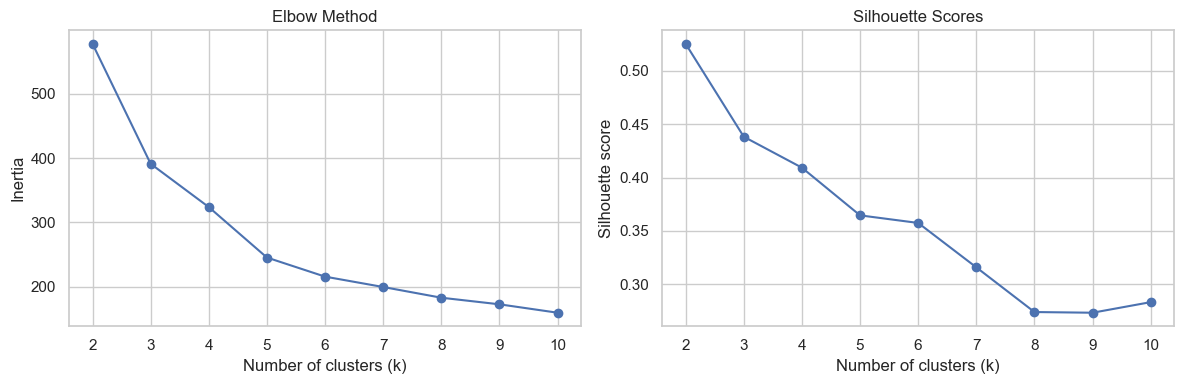

In [827]:
plt.figure(figsize=(12, 4))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")

plt.tight_layout()
plt.show()


### Interpretation of k

From the elbow plot, the largest drop in inertia happens between k = 2 and k = 3. After k = 3 the curve starts to flatten, meaning additional clusters do not provide much improvement.

The silhouette scores show the highest value at k = 2, but k = 3 still has a strong score and performs noticeably better than k ≥ 4, where the silhouette drops sharply.

Taking both plots together, **k = 3** is the most balanced choice. It provides a clear improvement over k = 2 in the elbow method while maintaining a good silhouette score. This also aligns with the biological expectation of three species, although the clustering itself is unsupervised.

For these reasons, I select **k = 3** for the final K-Means model.


In [828]:
# Fit final K-Means model with k = 3
k = 3
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Clusters assigned successfully.")
df["cluster"].value_counts()


Clusters assigned successfully.


cluster
0    132
1    123
2     89
Name: count, dtype: int64

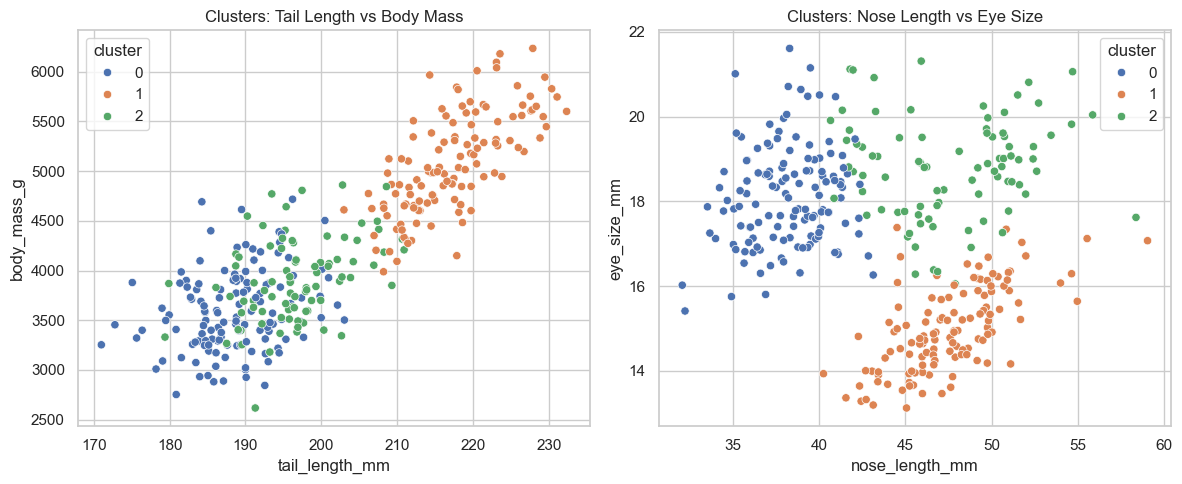

In [829]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g", hue="cluster", palette="deep")
plt.title("Clusters: Tail Length vs Body Mass")

# Plot 2
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm", hue="cluster", palette="deep")
plt.title("Clusters: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()

In [830]:
print("Cluster Summary Statistics (Mean Values):")
df.groupby("cluster")[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]].mean()


Cluster Summary Statistics (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,length_ratio
cluster,,,,,
0,38.209773,18.109621,188.467727,3591.187424,4.950504
1,47.506016,14.989675,217.262846,5078.801463,4.586224
2,47.592069,18.783678,196.634483,3904.057586,4.158222


### Interpretation of Clusters

The three clusters show clear and interpretable structural differences:

- **Cluster 0 (blue):**  
  This group contains the lightest and smallest haggis. They have the shortest tails, the lowest body mass, and relatively small overall measurements. These traits match the characteristics of the **Macduff** species.

- **Cluster 1 (orange):**  
  This cluster represents the largest haggis. They have the longest tails, the highest body mass (often exceeding 5500 g), and the largest nose lengths. Their eye size is smaller relative to their body size. This pattern is consistent with the **WildRambler** species.

- **Cluster 2 (green):**  
  This cluster shows medium body mass, medium tail length, and notably larger eye sizes than the other groups. These measurements place them between the other two species, aligning with the **BogSniffer** species.

Even though K-Means was applied without using species labels, the resulting clusters map closely onto biological differences between the three species. This indicates that the morphological features contain enough structure for the species groups to emerge naturally through unsupervised learning.


### Density-Based Clustering (DBSCAN)

To complement K-Means, I apply DBSCAN, a density-based clustering algorithm. Unlike K-Means, DBSCAN does not require choosing the number of clusters in advance. Instead, it groups points based on local density and labels points in low-density areas as noise.

This method can reveal alternative structure in the data, especially if clusters are irregularly shaped or if outliers exist.


In [831]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# DBSCAN typically needs tuning of epsilon and min_samples.
# We start with a reasonable default based on scaled data.

dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df["dbscan_cluster"] = db_labels

print("DBSCAN cluster counts:")
print(df["dbscan_cluster"].value_counts())


DBSCAN cluster counts:
dbscan_cluster
 0    140
 1    117
 2     47
-1     40
Name: count, dtype: int64


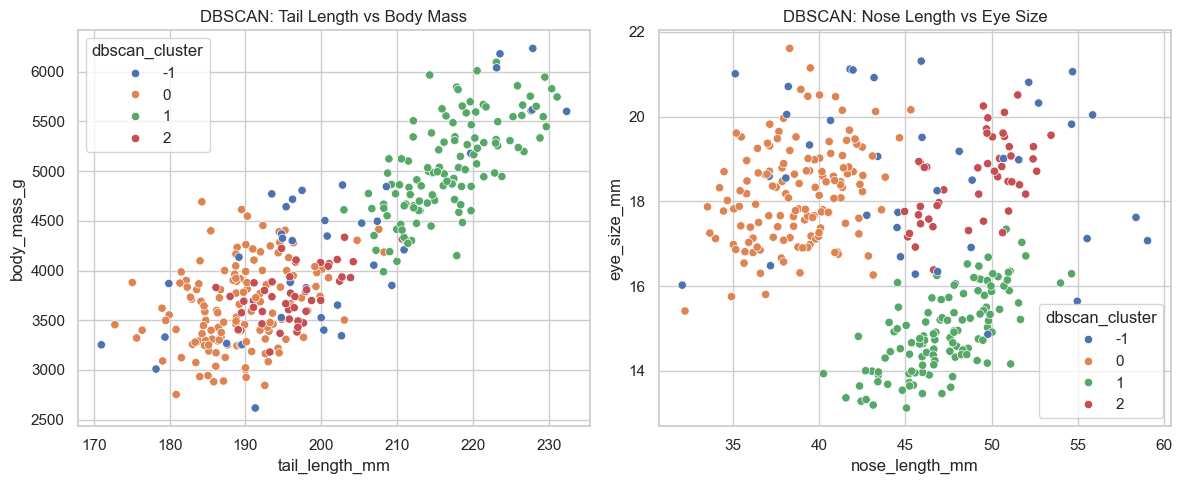

In [832]:
plt.figure(figsize=(12, 5))

# Plot 1: tail length vs body mass
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x="tail_length_mm",
    y="body_mass_g",
    hue="dbscan_cluster",
    palette="deep"
)
plt.title("DBSCAN: Tail Length vs Body Mass")

# Plot 2: nose length vs eye size
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x="nose_length_mm",
    y="eye_size_mm",
    hue="dbscan_cluster",
    palette="deep"
)
plt.title("DBSCAN: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


### DBSCAN Interpretation

DBSCAN identifies three main dense groups in the data, plus a set of noise points (labelled as –1):

- **Cluster 0 (orange):** Haggis with shorter tails and lower body mass, and mid-range nose and eye sizes. This corresponds to the smaller Macduff-type individuals seen earlier.
- **Cluster 1 (green):** The largest haggis, with long tails, high body mass and long noses, but relatively small eyes. This matches the WildRambler-type group.
- **Cluster 2 (red):** Haggis with intermediate tail length and body mass, but relatively large eyes and longer noses. This fits the BogSniffer-type morphology.

DBSCAN also marks a handful of points as **noise** (cluster = –1). These tend to lie near the edges of the main groups and represent borderline or unusual individuals that K-Means was forced to assign to a cluster.

Overall, DBSCAN recovers a very similar three-group structure to K-Means, but with two key differences:
1. It explicitly flags borderline cases as noise instead of forcing them into a cluster.
2. It allows more flexible cluster shapes, rather than the spherical clusters assumed by K-Means.

This consistency between DBSCAN and K-Means strengthens the conclusion that there are three meaningful morphological groupings in the dataset, broadly aligned with the three haggis species.


### Stage 2 Conclusion

The clustering analysis shows that the Scottish haggis dataset contains a clear underlying structure. After imputing missing values and scaling the numerical features, I evaluated multiple values of k using the Elbow Method and Silhouette Score. Both metrics indicated that **k = 3** offers the best balance between compactness and separation.

The final K-Means model with three clusters revealed well-defined groups that align closely with the known morphological differences between the three haggis species. Cluster profiles showed distinct patterns in body mass, tail length, nose length, and eye size, confirming that these measurements are strong indicators of species-level variation.

As an additional comparison, I applied DBSCAN. This density-based method also identified three main dense regions along with a small number of noise points, demonstrating that some individuals lie on the boundaries between groups. Although DBSCAN produces more flexible cluster shapes, it led to a broadly similar interpretation: the data naturally forms three meaningful morphological clusters.

Together, these findings show that the haggis measurements contain enough structure for species-level grouping to emerge without using labels. This provides a strong foundation for the supervised classification models developed in the next stage.
